In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
df = pd.read_csv('/content/Drug_overdose_death_rates.csv')
print(df.head())

                   INDICATOR                     PANEL  PANEL_NUM  \
0  Drug overdose death rates  All drug overdose deaths          0   
1  Drug overdose death rates  All drug overdose deaths          0   
2  Drug overdose death rates  All drug overdose deaths          0   
3  Drug overdose death rates  All drug overdose deaths          0   
4  Drug overdose death rates  All drug overdose deaths          0   

                                                UNIT  UNIT_NUM STUB_NAME  \
0  Deaths per 100,000 resident population, age-ad...         1     Total   
1  Deaths per 100,000 resident population, age-ad...         1     Total   
2  Deaths per 100,000 resident population, age-ad...         1     Total   
3  Deaths per 100,000 resident population, age-ad...         1     Total   
4  Deaths per 100,000 resident population, age-ad...         1     Total   

   STUB_NAME_NUM   STUB_LABEL  STUB_LABEL_NUM  YEAR  YEAR_NUM       AGE  \
0              0  All persons             0.1  1999  

Dataset Loaded Successfully

Dataset Head:
                    INDICATOR                     PANEL  PANEL_NUM  \
0  Drug overdose death rates  All drug overdose deaths          0   
1  Drug overdose death rates  All drug overdose deaths          0   
2  Drug overdose death rates  All drug overdose deaths          0   
3  Drug overdose death rates  All drug overdose deaths          0   
4  Drug overdose death rates  All drug overdose deaths          0   

                                                UNIT  UNIT_NUM STUB_NAME  \
0  Deaths per 100,000 resident population, age-ad...         1     Total   
1  Deaths per 100,000 resident population, age-ad...         1     Total   
2  Deaths per 100,000 resident population, age-ad...         1     Total   
3  Deaths per 100,000 resident population, age-ad...         1     Total   
4  Deaths per 100,000 resident population, age-ad...         1     Total   

   STUB_NAME_NUM   STUB_LABEL  STUB_LABEL_NUM  YEAR  YEAR_NUM       AGE  \
0        

<ipython-input-23-d2517b1f5628>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-23-d2517b1f5628>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

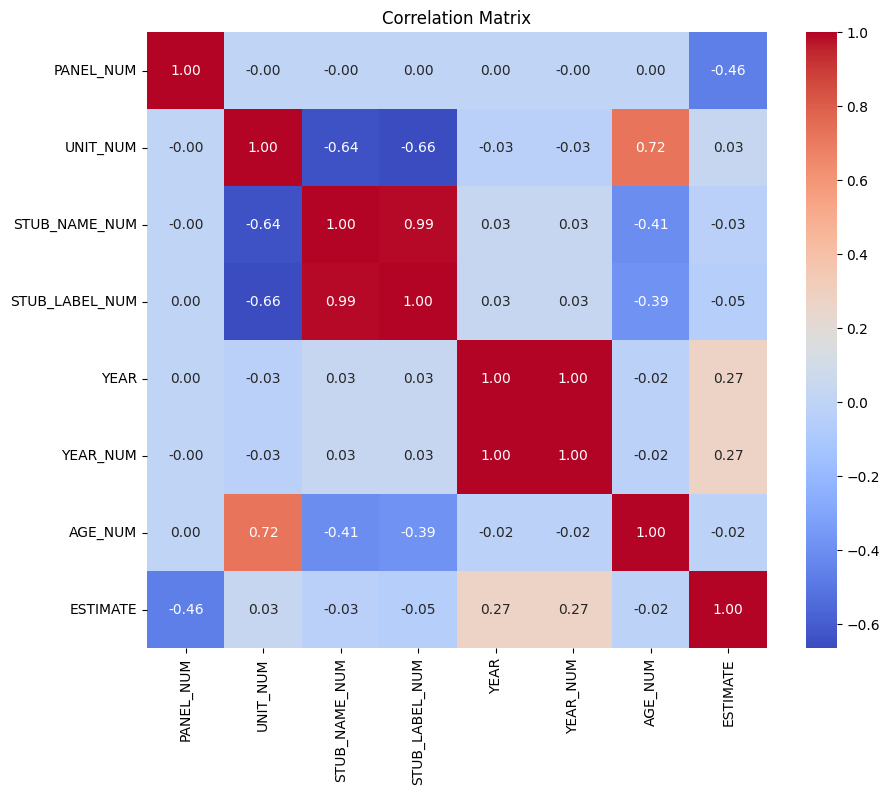

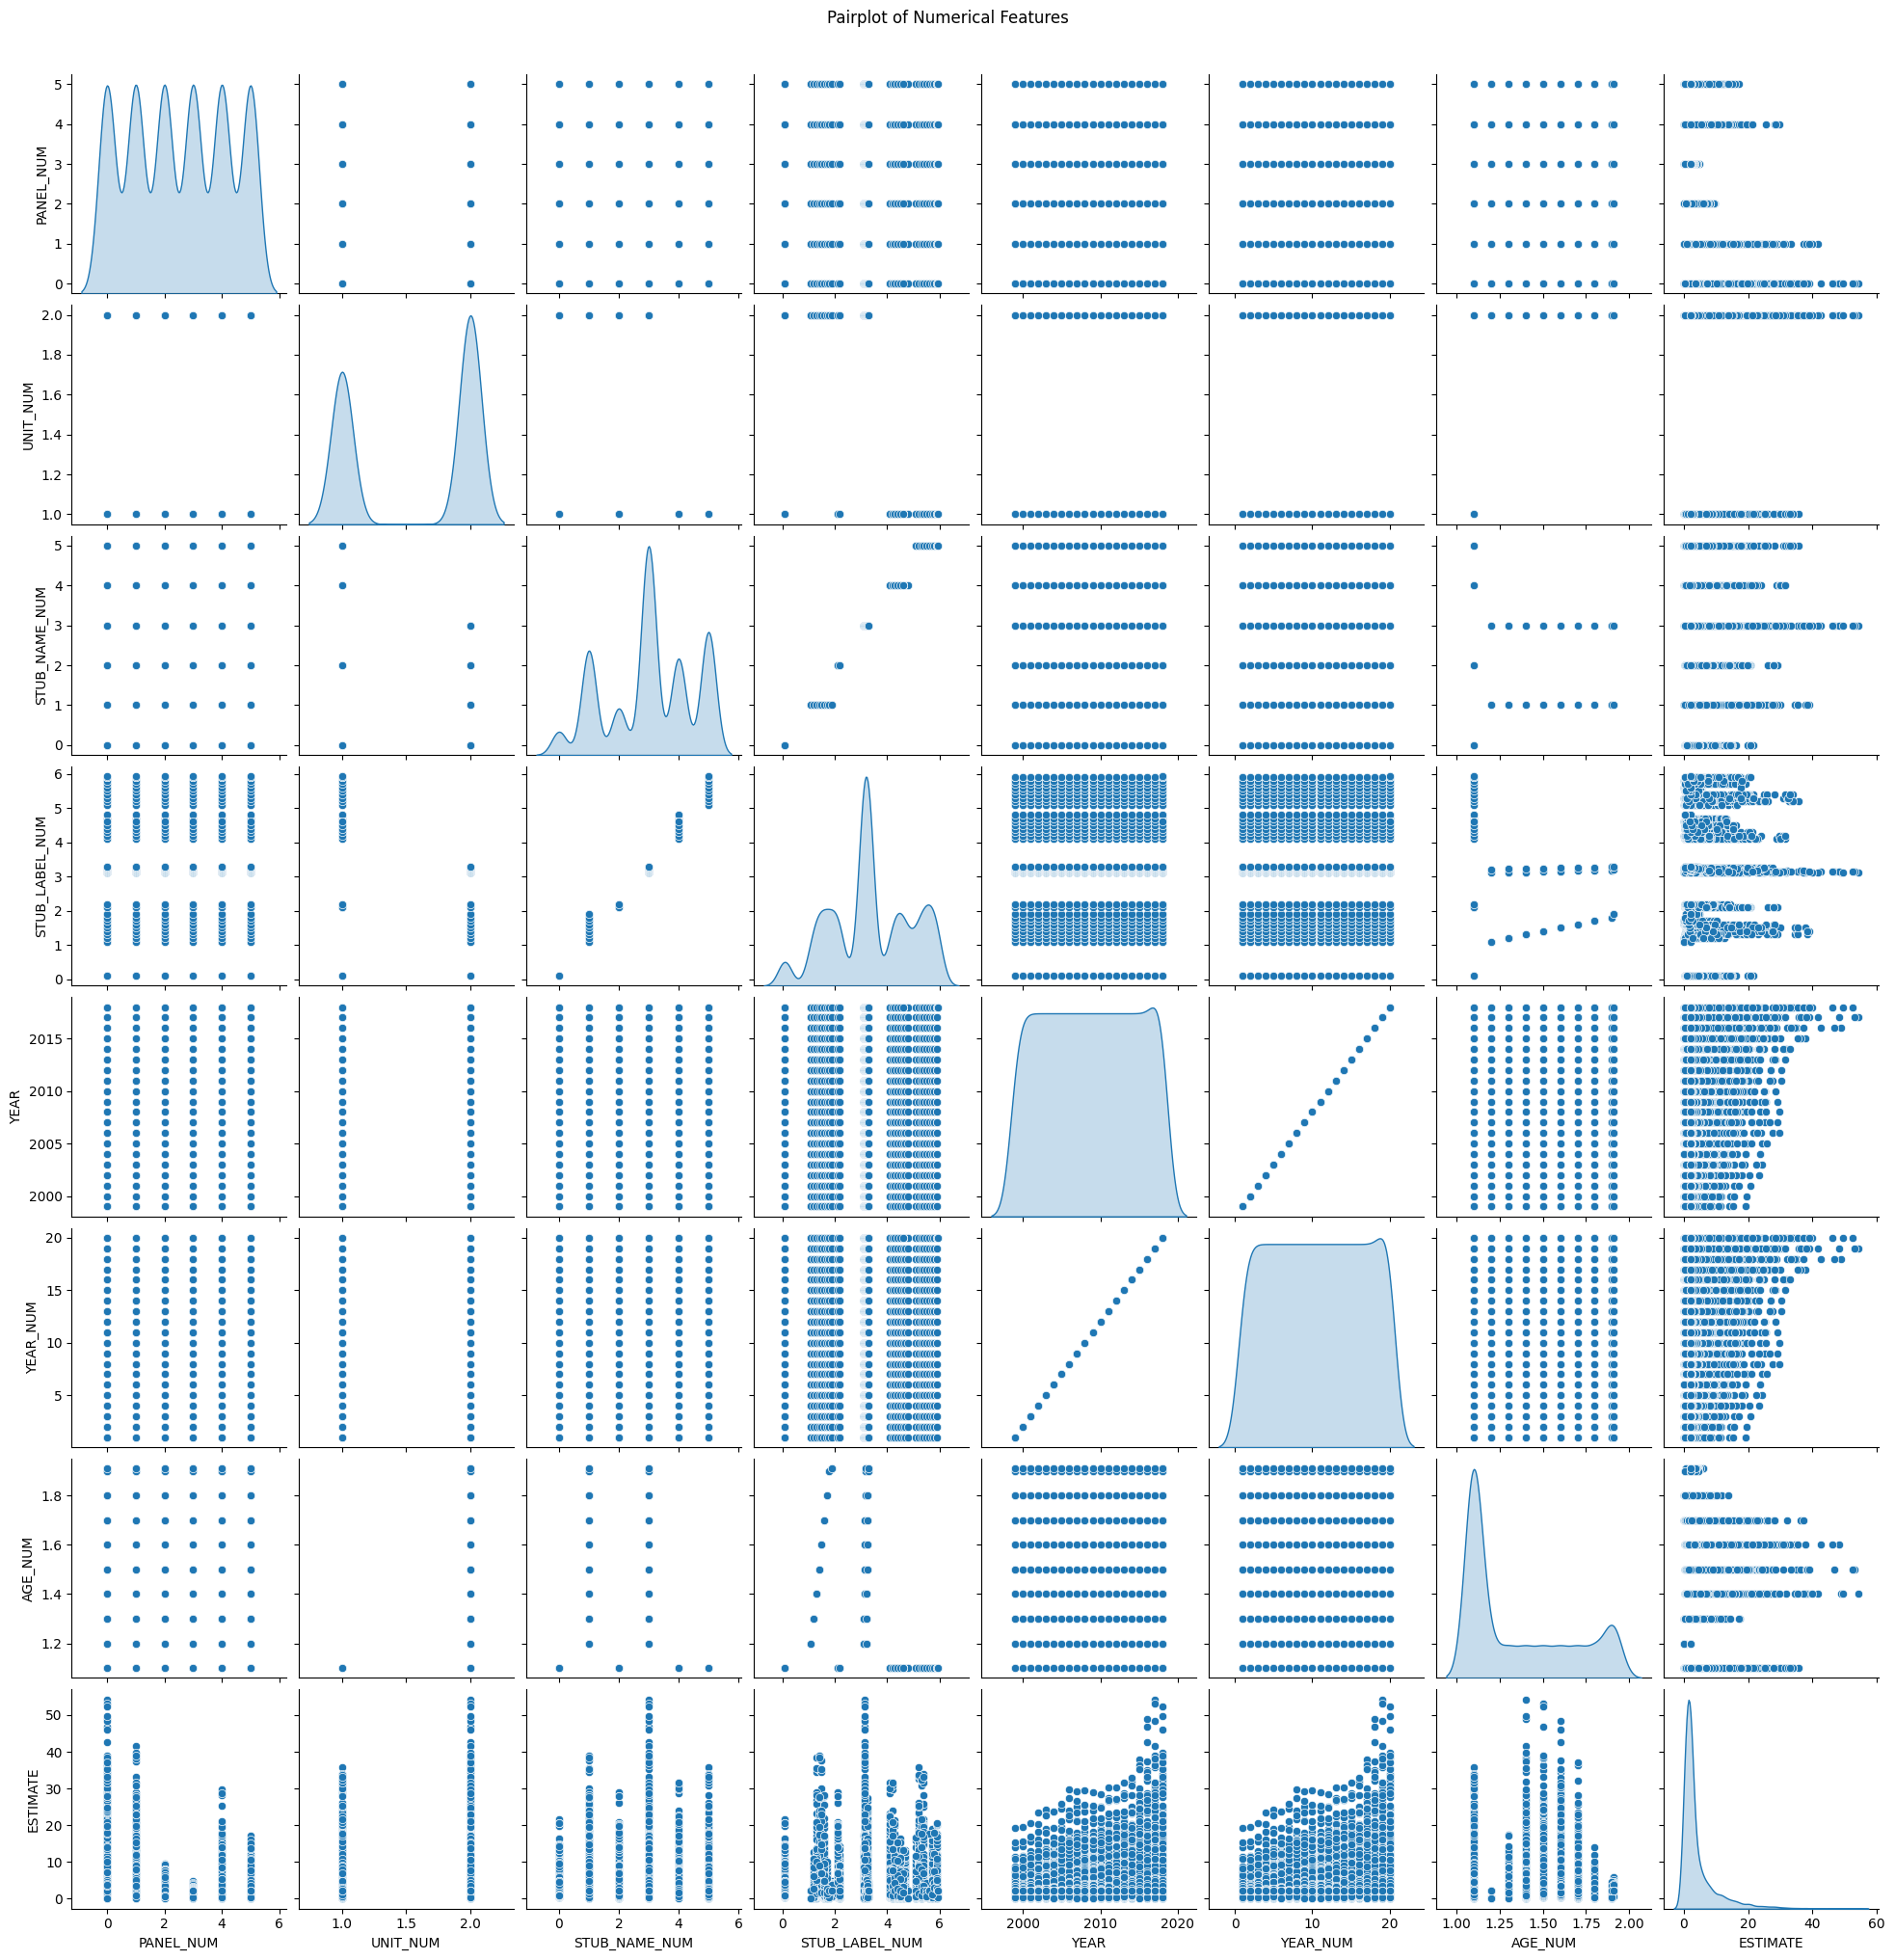


Shape of X_train: (4982, 8)
Shape of X_test: (1246, 8)
Shape of y_train: (4982,)
Shape of y_test: (1246,)


In [23]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = '/content/Drug_overdose_death_rates.csv'  # Adjust path for Colab
df = pd.read_csv(file_path)

# Display initial information
print("Dataset Loaded Successfully")
print("\nDataset Head:\n", df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# Drop irrelevant columns (adjust as needed based on understanding of the dataset)
drop_columns = ['PANEL', 'UNIT', 'STUB_NAME', 'STUB_LABEL', 'AGE', 'FLAG']
df = df.drop(columns=drop_columns)

# Handle missing values
# Fill missing numerical columns with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical columns with the most frequent value
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# EDA: Summary statistics
print("\nSummary Statistics:\n", df.describe())

# EDA: Count of unique values in categorical columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:\n", df[col].value_counts())

# EDA: Correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot for numerical variables (optional, useful for visual exploration)
sns.pairplot(df, vars=numerical_cols, diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Convert categorical features using OneHotEncoder
categorical_features = ['INDICATOR', 'STUB_LABEL_NUM']  # Replace with actual categorical columns
numerical_features = ['YEAR', 'AGE_NUM', 'ESTIMATE']  # Replace with actual numerical columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define features (X) and target (y)
target_column = 'ESTIMATE'  # Replace with actual target column name
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summary of splits
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Reload the dataset
file_path = '/content/Drug_overdose_death_rates.csv'
df = pd.read_csv(file_path)

# Handle missing values
df.fillna(method='ffill', inplace=True)  # Forward fill for simplicity
df.fillna(method='bfill', inplace=True)  # Backward fill if needed

# Define features (X) and target (y)
categorical_features = ['INDICATOR', 'PANEL', 'UNIT', 'STUB_NAME', 'STUB_LABEL', 'AGE']
numerical_features = ['PANEL_NUM', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM', 'AGE_NUM']
target_feature = 'ESTIMATE'

X = df[categorical_features + numerical_features]
y = df[target_feature]

# Preprocessor for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Preprocess the features
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print("Data preprocessing and encoding complete.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


Data preprocessing and encoding complete.
X_train shape: (4982, 86)
X_test shape: (1246, 86)


<ipython-input-24-16a320c843cf>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill for simplicity
<ipython-input-24-16a320c843cf>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill if needed


Linear Regression - Train RMSE: 3.97, Test RMSE: 4.08
Linear Regression - Train R^2: 0.5596, Test R^2: 0.5613


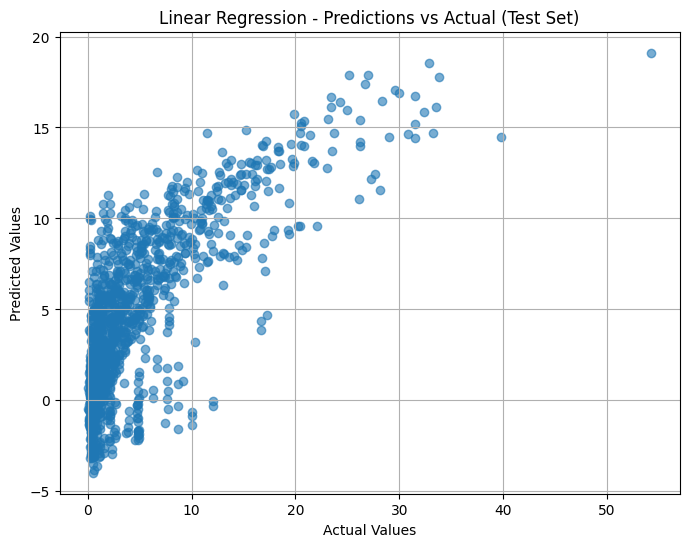

Decision Tree - Train RMSE: 0.00, Test RMSE: 1.44
Decision Tree - Train R^2: 1.0000, Test R^2: 0.9456


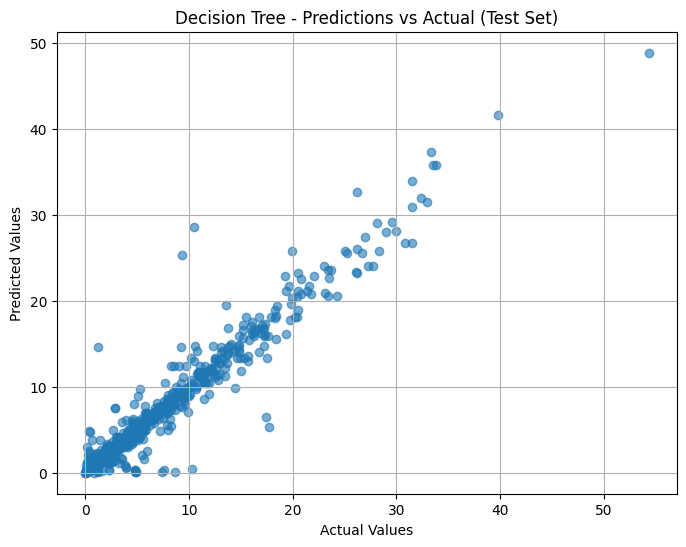

Random Forest - Train RMSE: 0.41, Test RMSE: 0.94
Random Forest - Train R^2: 0.9952, Test R^2: 0.9765


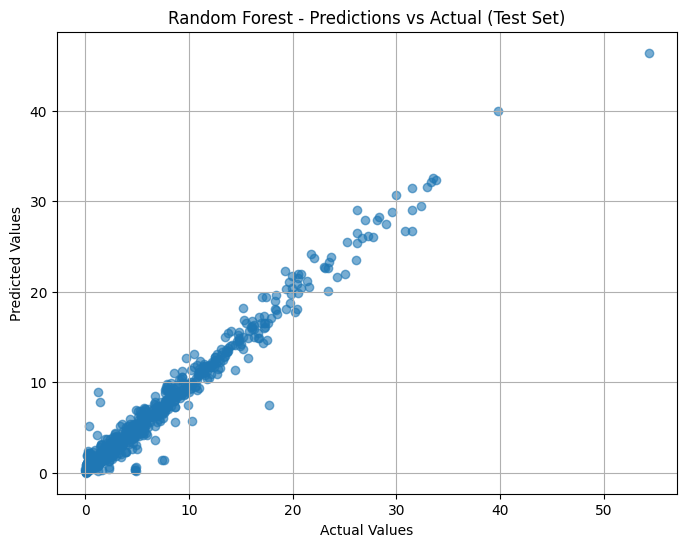

Gradient Boosting - Train RMSE: 2.43, Test RMSE: 2.72
Gradient Boosting - Train R^2: 0.8344, Test R^2: 0.8046


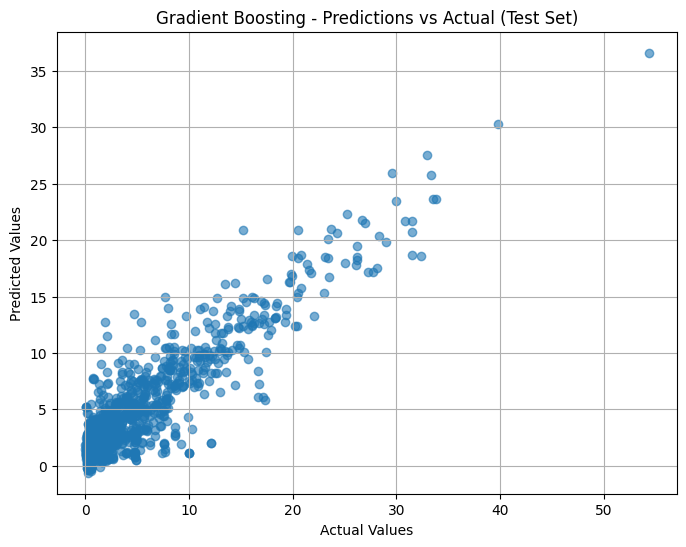

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on training and testing sets
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)

    # Print metrics
    print(f"{name} - Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    print(f"{name} - Train R^2: {train_r2:.4f}, Test R^2: {test_r2:.4f}")

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, test_preds, alpha=0.6)
    plt.title(f"{name} - Predictions vs Actual (Test Set)")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, cohen_kappa_score

# Function to evaluate and summarize metrics for each model
def evaluate_model_summary(model, X_train, X_test, y_train, y_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Calculate metrics
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = mean_squared_error(y_train, train_preds, squared=False)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = mean_squared_error(y_test, test_preds, squared=False)

    # Correctly and incorrectly classified instances
    correctly_classified = (test_preds.round() == y_test.round()).sum()
    incorrectly_classified = len(y_test) - correctly_classified

    return {
        "Correctly Classified Instances": correctly_classified,
        "Incorrectly Classified Instances": incorrectly_classified,
        "Kappa Statistic": cohen_kappa_score(y_test.round(), test_preds.round()) if len(set(y_test)) > 1 else "N/A",
        "Mean Absolute Error": test_mae,
        "Root Mean Squared Error": test_rmse,
        "Total Number of Instances": len(y_test),
    }

# Initialize a dictionary to store results
summary_results = {}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    summary_results[name] = evaluate_model_summary(model, X_train, X_test, y_train, y_test)

# Convert the summary to a DataFrame for better readability
import pandas as pd
summary_df = pd.DataFrame(summary_results).T

# Display the summary table
print("\nSummary of Evaluation Metrics:")
print(summary_df)


Evaluating Linear Regression...
Evaluating Decision Tree...
Evaluating Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Evaluating Gradient Boosting...

Summary of Evaluation Metrics:
                   Correctly Classified Instances  \
Linear Regression                           171.0   
Decision Tree                               855.0   
Random Forest                               804.0   
Gradient Boosting                           284.0   

                   Incorrectly Classified Instances  Kappa Statistic  \
Linear Regression                            1075.0         0.071272   
Decision Tree                                 391.0         0.644007   
Random Forest                                 442.0         0.596209   
Gradient Boosting                             962.0         0.134109   

                   Mean Absolute Error  Root Mean Squared Error  \
Linear Regression             2.791980                 4.075817   
Decision Tree                 0.557143                 1.435382   
Random Forest                 0.468822                 0.942592   
Gradient Boosting             1.814962   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Confusion Matrix for Linear Regression:


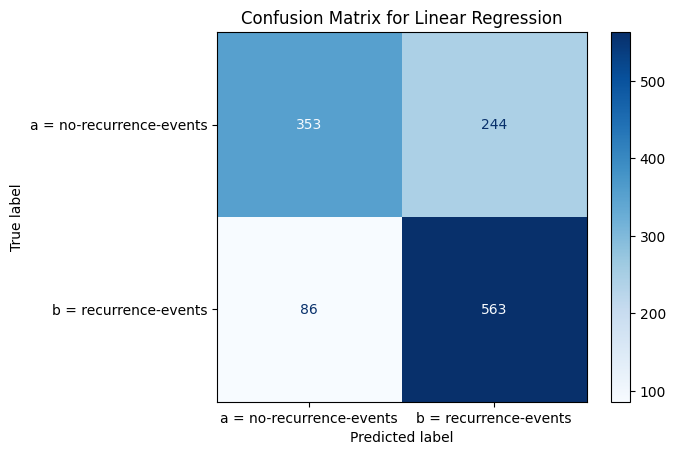

Confusion Matrix for Decision Tree:


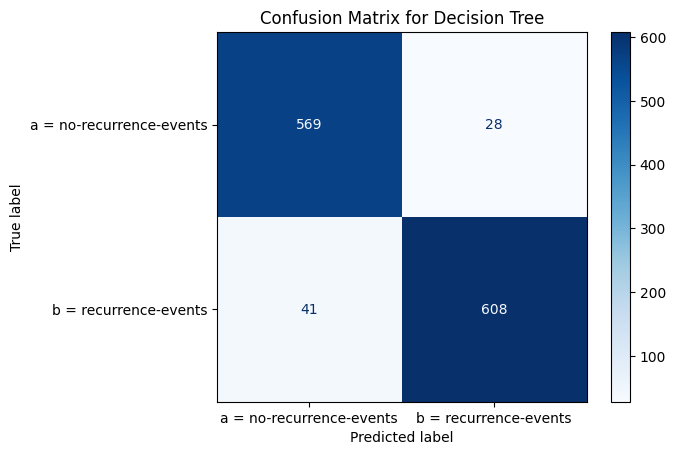

Confusion Matrix for Random Forest:


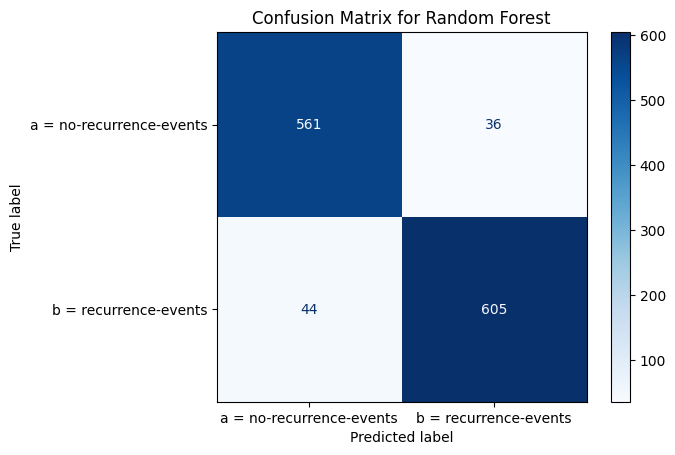

Confusion Matrix for Gradient Boosting:


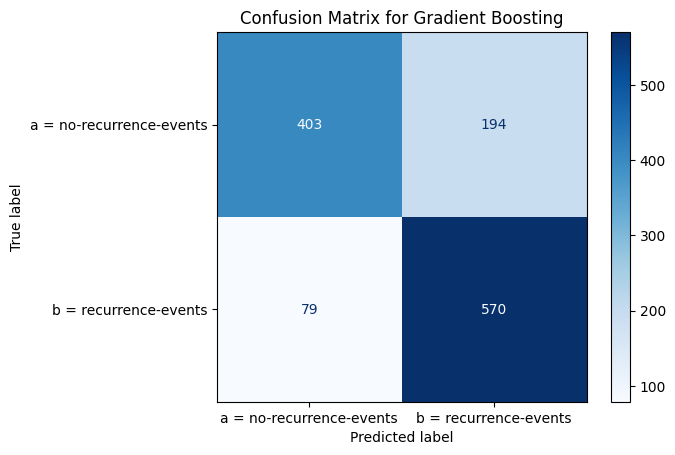

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Convert continuous target values to discrete classes (binning)
def binarize_regression_output(y_true, y_pred, threshold):
    y_true_class = (y_true >= threshold).astype(int)
    y_pred_class = (y_pred >= threshold).astype(int)
    return y_true_class, y_pred_class

# Function to plot confusion matrix
def plot_confusion_matrix(y_true_class, y_pred_class, model_name):
    cm = confusion_matrix(y_true_class, y_pred_class)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['a = no-recurrence-events', 'b = recurrence-events'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Evaluate confusion matrices for all models
for name, model in models.items():
    print(f"Confusion Matrix for {name}:")

    # Get predictions
    y_pred = model.predict(X_test)

    # Binarize the regression outputs based on a threshold
    threshold = y_test.median()  # Example: Use median as a threshold
    y_true_class, y_pred_class = binarize_regression_output(y_test, y_pred, threshold)

    # Plot the confusion matrix
    plot_confusion_matrix(y_true_class, y_pred_class, name)


In [28]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    average_precision_score
)
import numpy as np

# Function to calculate detailed accuracy metrics by class
def detailed_accuracy_by_class(y_true, y_pred, threshold):
    # Binarize regression outputs
    y_true_class = (y_true >= threshold).astype(int)
    y_pred_class = (y_pred >= threshold).astype(int)

    # Calculate metrics
    tp_rate = recall_score(y_true_class, y_pred_class, pos_label=1)
    fp_rate = recall_score(y_true_class, y_pred_class, pos_label=0)
    precision = precision_score(y_true_class, y_pred_class)
    recall = recall_score(y_true_class, y_pred_class)
    f_measure = f1_score(y_true_class, y_pred_class)
    mcc = matthews_corrcoef(y_true_class, y_pred_class)
    roc_area = roc_auc_score(y_true_class, y_pred)
    prc_area = average_precision_score(y_true_class, y_pred)

    return {
        "TP Rate": tp_rate,
        "FP Rate": fp_rate,
        "Precision": precision,
        "Recall": recall,
        "F-Measure": f_measure,
        "MCC": mcc,
        "ROC Area": roc_area,
        "PRC Area": prc_area,
    }

# Evaluate metrics for all models
threshold = y_test.median()  # Use median of the target as a threshold
for name, model in models.items():
    print(f"Detailed Accuracy by Class for {name}:")

    # Predict on test data
    y_pred = model.predict(X_test)

    # Get metrics
    metrics = detailed_accuracy_by_class(y_test, y_pred, threshold)

    # Display metrics
    print(f"{'Metric':<20}{'Value':<10}")
    for metric, value in metrics.items():
        print(f"{metric:<20}{value:<10.4f}")
    print("\n")


Detailed Accuracy by Class for Linear Regression:
Metric              Value     
TP Rate             0.8675    
FP Rate             0.5913    
Precision           0.6976    
Recall              0.8675    
F-Measure           0.7734    
MCC                 0.4798    
ROC Area            0.8403    
PRC Area            0.8723    


Detailed Accuracy by Class for Decision Tree:
Metric              Value     
TP Rate             0.9368    
FP Rate             0.9531    
Precision           0.9560    
Recall              0.9368    
F-Measure           0.9463    
MCC                 0.8893    
ROC Area            0.9699    
PRC Area            0.9772    


Detailed Accuracy by Class for Random Forest:
Metric              Value     
TP Rate             0.9322    
FP Rate             0.9397    
Precision           0.9438    
Recall              0.9322    
F-Measure           0.9380    
MCC                 0.8715    
ROC Area            0.9789    
PRC Area            0.9824    


Detailed Accura